# A Regressão Logística
<img src="https://drive.google.com/uc?id=1YXiCkxBJ0vf8WQRjLgiw6uI-Xp2T56cZ" style='width: 300px;' />


In [4]:
# Importando o dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

base = pd.DataFrame

display(base)
# Considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
x = base['petal width (cm)', 'Target']
y = y[y.isin([0,1])].values

# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

KeyError: ('petal width (cm)', 'Target')

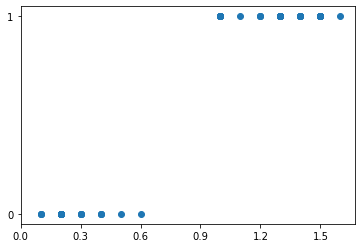

In [ ]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

- **Utilizando a regressão logística**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [ ]:
# Importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Criando o nosso classificador
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [ ]:
# Verificando o coeficiente angular
w1 = clf.coef_[0][0]

In [ ]:
# E o coeficiente linear
w0 = clf.intercept_[0]

- Para traçar esse gráfico, já temos a função `expit` do scipy
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    - `expit(x) = 1/(1+exp(-x))`

In [ ]:
# Importando o expit
from scipy.special import expit

In [ ]:
# Importando o numpy e criando um array de 0 a 2
import numpy as np
valores_x = np.linspace(X_train.min(),X_train.max(),100)
# valores_x

- Para o caso binário, podemos calcular a curva em função do coef_ e do intercept_ fazendo `expit(x*w1+w0)`
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case

In [ ]:
# Calculando o valor para cada valor de y
valores_y = expit(w1*valores_x+w0)

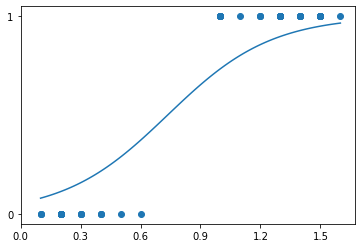

In [ ]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [ ]:
# Podemos exibir os dados de treino em cima dessa curva
y_curva = expit(w1*X_train+w0)

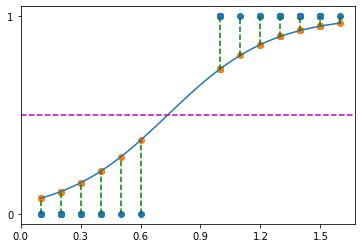

In [ ]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_train, y_curva)

ax.axhline(y=0.5,c='m',linestyle='--')

ax.plot([0.1,0.1],[0,0.07883025],'--g')
ax.plot([0.2,0.2],[0,0.11156652],'--g')
ax.plot([0.3,0.3],[0,0.15560101],'--g')
ax.plot([0.4,0.4],[0,0.21285167],'--g')
ax.plot([0.5,0.5],[0,0.28408003],'--g')
ax.plot([0.6,0.6],[0,0.36800066],'--g')
ax.plot([1,1],[0.72972574,1],'--g')
ax.plot([1.1,1.1],[0.79846697,1],'--g')
ax.plot([1.2,1.2],[0.85324086,1],'--g')
ax.plot([1.3,1.3],[0.89508404,1],'--g')
ax.plot([1.4,1.4],[0.92603135,1],'--g')
ax.plot([1.5,1.5],[0.94837655,1],'--g')
ax.plot([1.6,1.6],[0.96423221,1],'--g')

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [ ]:
# Fazendo a previsão das probabilidades
clf.predict_proba(X_train.reshape(-1,1))[0:5]

array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [ ]:
# Verificando o X_train
X_train[0:5]

array([0.2, 1. , 0.4, 1.5, 1.4])

In [ ]:
# e o y_train
y_train[0:5]

array([0, 1, 0, 1, 1])

- **Utilizando essa previsão na base de teste**

In [ ]:
# Verificando a previsão da probabilidade
y_pred = clf.predict_proba(X_test.reshape(-1,1))

In [ ]:
y_pred[:,1]

array([0.96541627, 0.89787791, 0.98368761, 0.15747043, 0.21550308,
       0.11281796, 0.11281796, 0.80276369, 0.11281796, 0.11281796,
       0.15747043, 0.11281796, 0.85677536, 0.11281796, 0.85677536,
       0.11281796, 0.92817373, 0.97620691, 0.07963048, 0.21550308,
       0.89787791, 0.89787791, 0.21550308, 0.11281796, 0.80276369,
       0.21550308, 0.15747043, 0.89787791, 0.07963048, 0.94998258,
       0.11281796, 0.11281796, 0.96541627])

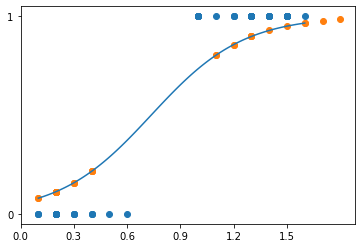

In [ ]:
# Verificando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_test,y_pred[:,1])

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [ ]:
# E apenas a previsão
y_pred_valor = clf.predict(X_test.reshape(-1,1))

In [ ]:
# Avaliando o erro
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_valor)

array([[19,  0],
       [ 0, 14]])

- **O caso binomial pode ser estendido para quantas classses quisermos, porém há um aumento na complexidade**
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case
- **Podemos considerar todos as classes e todas as colunas**

In [ ]:
# Importando novamente o dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True, as_frame=True)

In [ ]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Criando novamente o classificador
clf2 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

In [ ]:
# Verificando o coef_
clf2.coef_

array([[-0.39013908,  0.85592175, -2.24388851, -0.95263667],
       [ 0.43976987, -0.3612347 , -0.12437108, -0.77230146],
       [-0.0496308 , -0.49468705,  2.36825959,  1.72493813]])

In [ ]:
# e o intercept
clf2.intercept_

array([  8.69298967,   2.11594627, -10.80893594])

In [ ]:
# Fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [ ]:
# Avaliando o erro
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])